# Requirements

In [2]:
import pandas as pd
import missingno as msno
import matplotlib.pyplot as plt
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from xgboost import XGBClassifier

## Blood Pressure Analysis


# Dataset Description

## Attributes

* id - patient identifier
* age - patient age
* height - patient height in cm
* weight - patient weight in kg
* blood sugar - patient blood sugar level
* Cholesterol - patient cholesterol level
* triglyceride - patient triglyceride level
* HDL - patient high-density lipoprotein cholesterol level
* LDL - patient low-density lipoprotein cholesterol level
* hemoglobin - patient hemoglobin level
* Urine protein - patinet protein in urine level
* serum creatinine - patient serum creatinine level
* AST - patient aspartate aminotransferase level
* ALT - patient Alanine transaminase level
* Gtp - patient Guanosine-5'-triphosphate level
* dental caries - does patient have dental caries

### Target variable
* blood - patient systolic blood pressure

# Read the dataset

In [6]:
# Write your code here. Add as many boxes as you need.
data = pd.read_csv('Datasets/blood_pressure_data.csv')
data.head()

,id,age,height(cm),weight(kg),relaxation,blood sugar,Cholesterol,triglyceride,HDL,LDL,hemoglobin,Urine protein,serum creatinine,AST,ALT,Gtp,dental caries,blood pressure
0,NaN,NaN,180.0,65.0,70.0,NaN,149.0,NaN,NaN,87.0,13.9,1.0,NaN,19.0,NaN,NaN,No,112.0
1,57468.0,7/5/1979,150.0,50.0,88.0,92.0,219.0,LOW,NaN,137.0,13.2,NaN,0.6,26.0,17.0,NaN,No,138.0
2,55209.0,11/27/1954,175.0,75.0,NaN,NaN,217.0,NORMAL,50.0,142.0,NaN,1.0,0.8,22.0,22.0,NaN,No,137.0
3,3335.0,9/13/1984,160.0,NaN,NaN,100.0,160.0,HiGH,48.0,84.0,12.1,1.0,0.6,15.0,19.0,14.0,No,133.0
4,70782.0,8/15/1984,170.0,NaN,68.0,99.0,176.0,LOW,NaN,96.0,13.8,1.0,0.9,33.0,NaN,11.0,No,NaN


In [7]:
help(XGBClassifier)

Help on class XGBClassifier in module xgboost.sklearn:

class XGBClassifier(XGBModel, sklearn.base.ClassifierMixin)
 |  XGBClassifier(*, objective: Union[str, xgboost.sklearn._SklObjWProto, Callable[[Any, Any], Tuple[numpy.ndarray, numpy.ndarray]], NoneType] = 'binary:logistic', **kwargs: Any) -> None
 |
 |  Implementation of the scikit-learn API for XGBoost classification.
 |  See :doc:`/python/sklearn_estimator` for more information.
 |
 |  Parameters
 |  ----------
 |
 |      n_estimators : Optional[int]
 |          Number of boosting rounds.
 |
 |      max_depth :  typing.Optional[int]
 |
 |          Maximum tree depth for base learners.
 |
 |      max_leaves : typing.Optional[int]
 |
 |          Maximum number of leaves; 0 indicates no limit.
 |
 |      max_bin : typing.Optional[int]
 |
 |          If using histogram-based algorithm, maximum number of bins per feature
 |
 |      grow_policy : typing.Optional[str]
 |
 |          Tree growing policy.
 |
 |          - depthwise: Favo

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                7328 non-null   float64
 1   age               7312 non-null   object 
 2   height(cm)        7373 non-null   float64
 3   weight(kg)        7444 non-null   float64
 4   relaxation        7425 non-null   float64
 5   blood sugar       7438 non-null   float64
 6   Cholesterol       7386 non-null   float64
 7   triglyceride      8644 non-null   object 
 8   HDL               7391 non-null   float64
 9   LDL               7358 non-null   float64
 10  hemoglobin        7417 non-null   float64
 11  Urine protein     7475 non-null   float64
 12  serum creatinine  7433 non-null   float64
 13  AST               7427 non-null   float64
 14  ALT               7416 non-null   float64
 15  Gtp               7411 non-null   float64
 16  dental caries     10000 non-null  object 

Explore the dataset using visualizations of your choice.

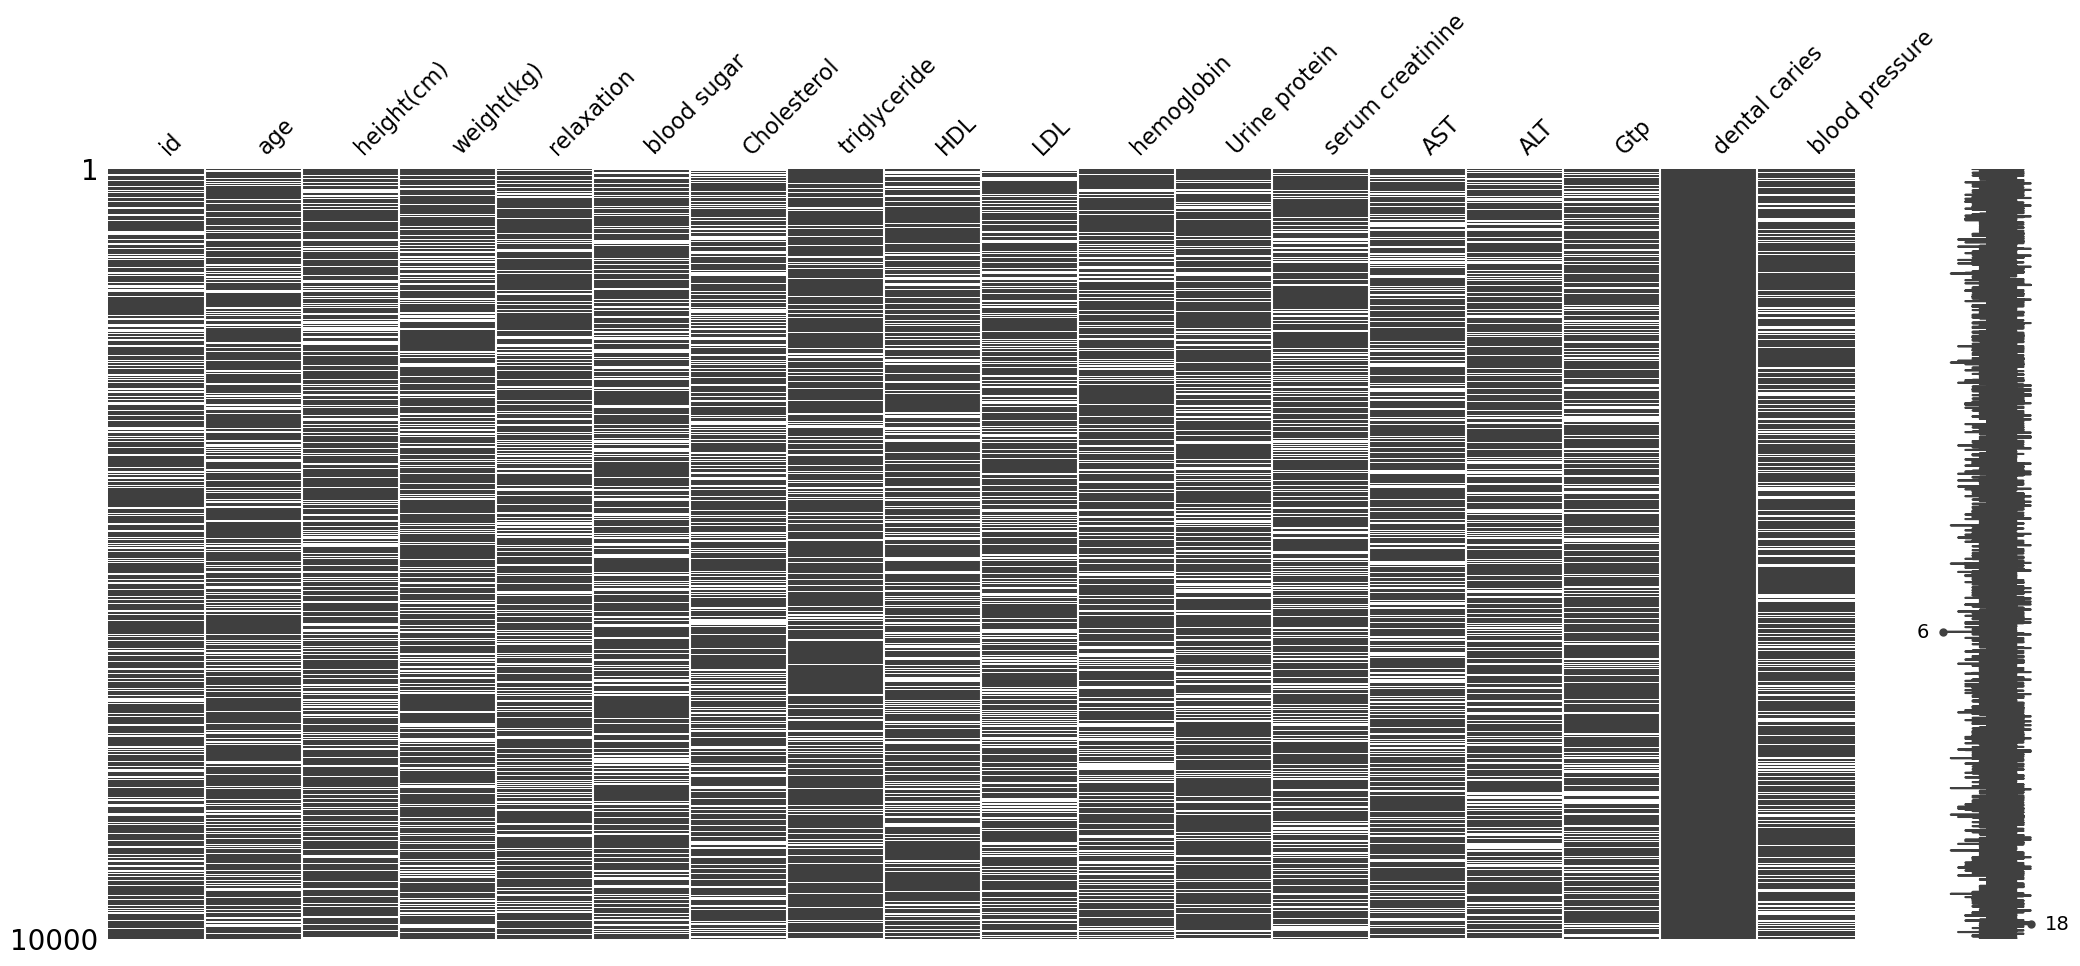

In [10]:
# Write your code here. Add as many boxes as you need.
msno.matrix(data)
plt.show()

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [12]:
# Write your code here. Add as many boxes as you need.
data.isnull().sum()

id                  2672
age                 2688
height(cm)          2627
weight(kg)          2556
relaxation          2575
blood sugar         2562
Cholesterol         2614
triglyceride        1356
HDL                 2609
LDL                 2642
hemoglobin          2583
Urine protein       2525
serum creatinine    2567
AST                 2573
ALT                 2584
Gtp                 2589
dental caries          0
blood pressure      2523
dtype: int64

In [13]:
data.isnull().mean()*100

id                  26.72
age                 26.88
height(cm)          26.27
weight(kg)          25.56
relaxation          25.75
blood sugar         25.62
Cholesterol         26.14
triglyceride        13.56
HDL                 26.09
LDL                 26.42
hemoglobin          25.83
Urine protein       25.25
serum creatinine    25.67
AST                 25.73
ALT                 25.84
Gtp                 25.89
dental caries        0.00
blood pressure      25.23
dtype: float64

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

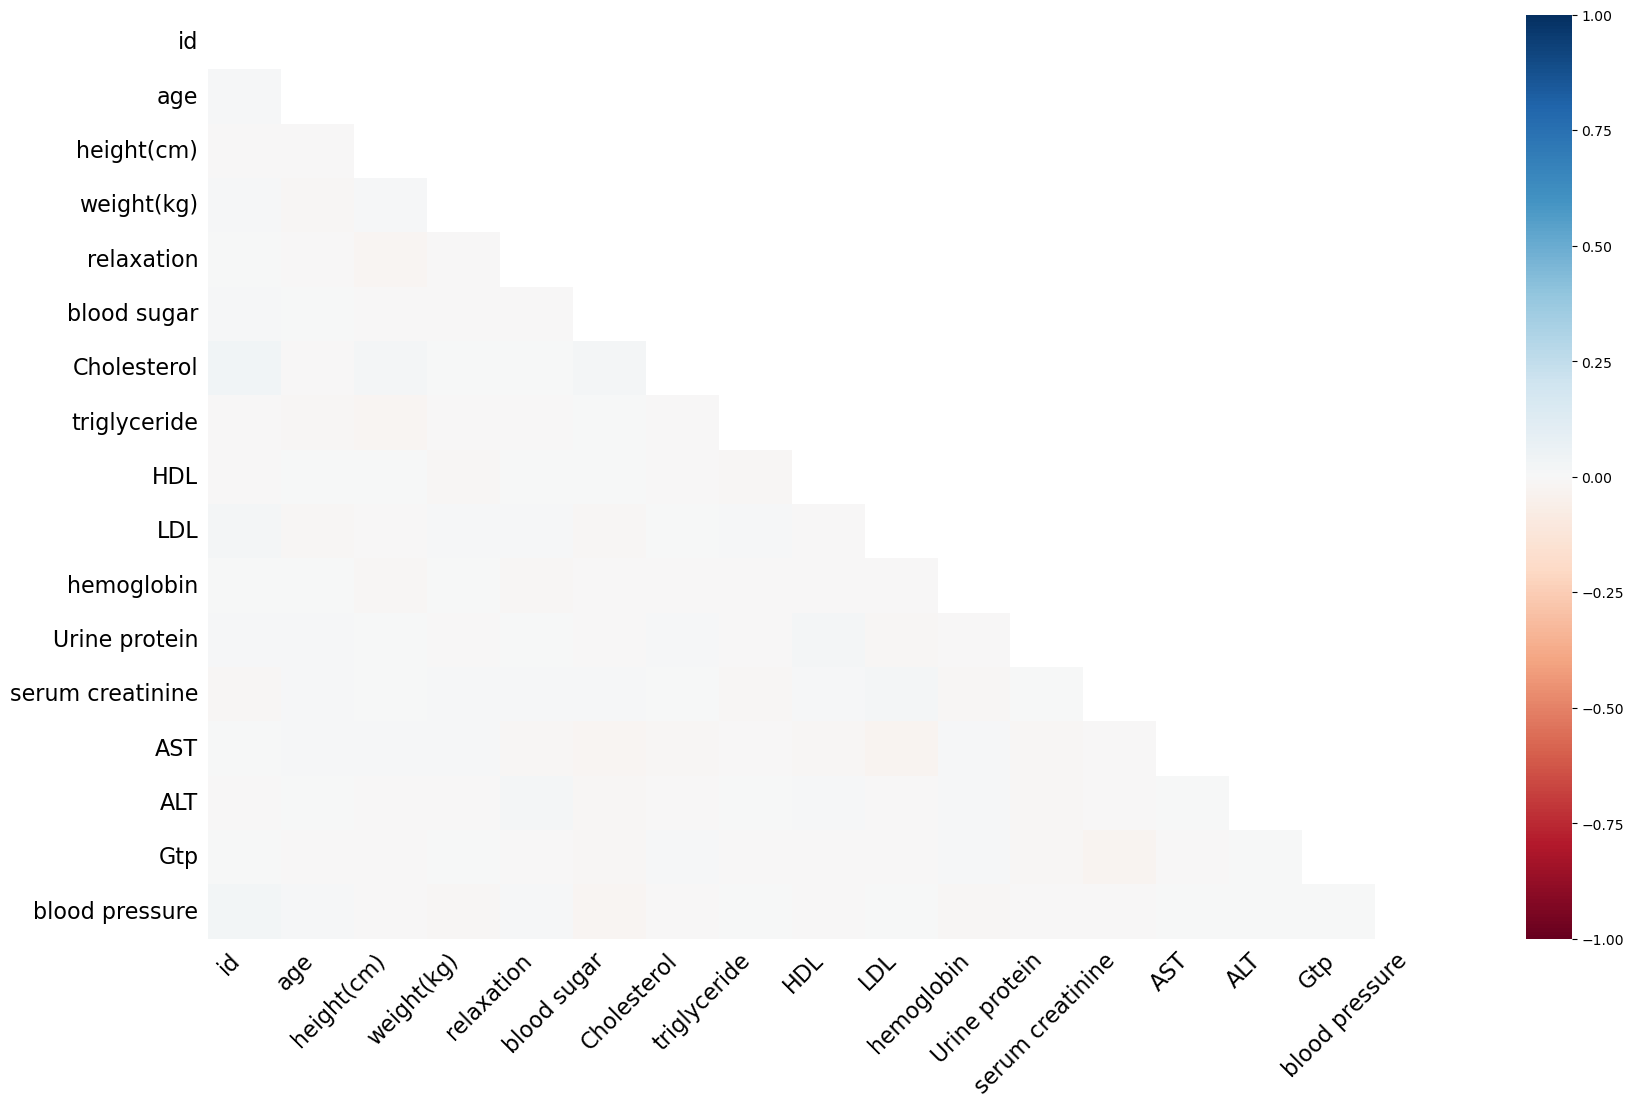

In [15]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(data)
plt.show()

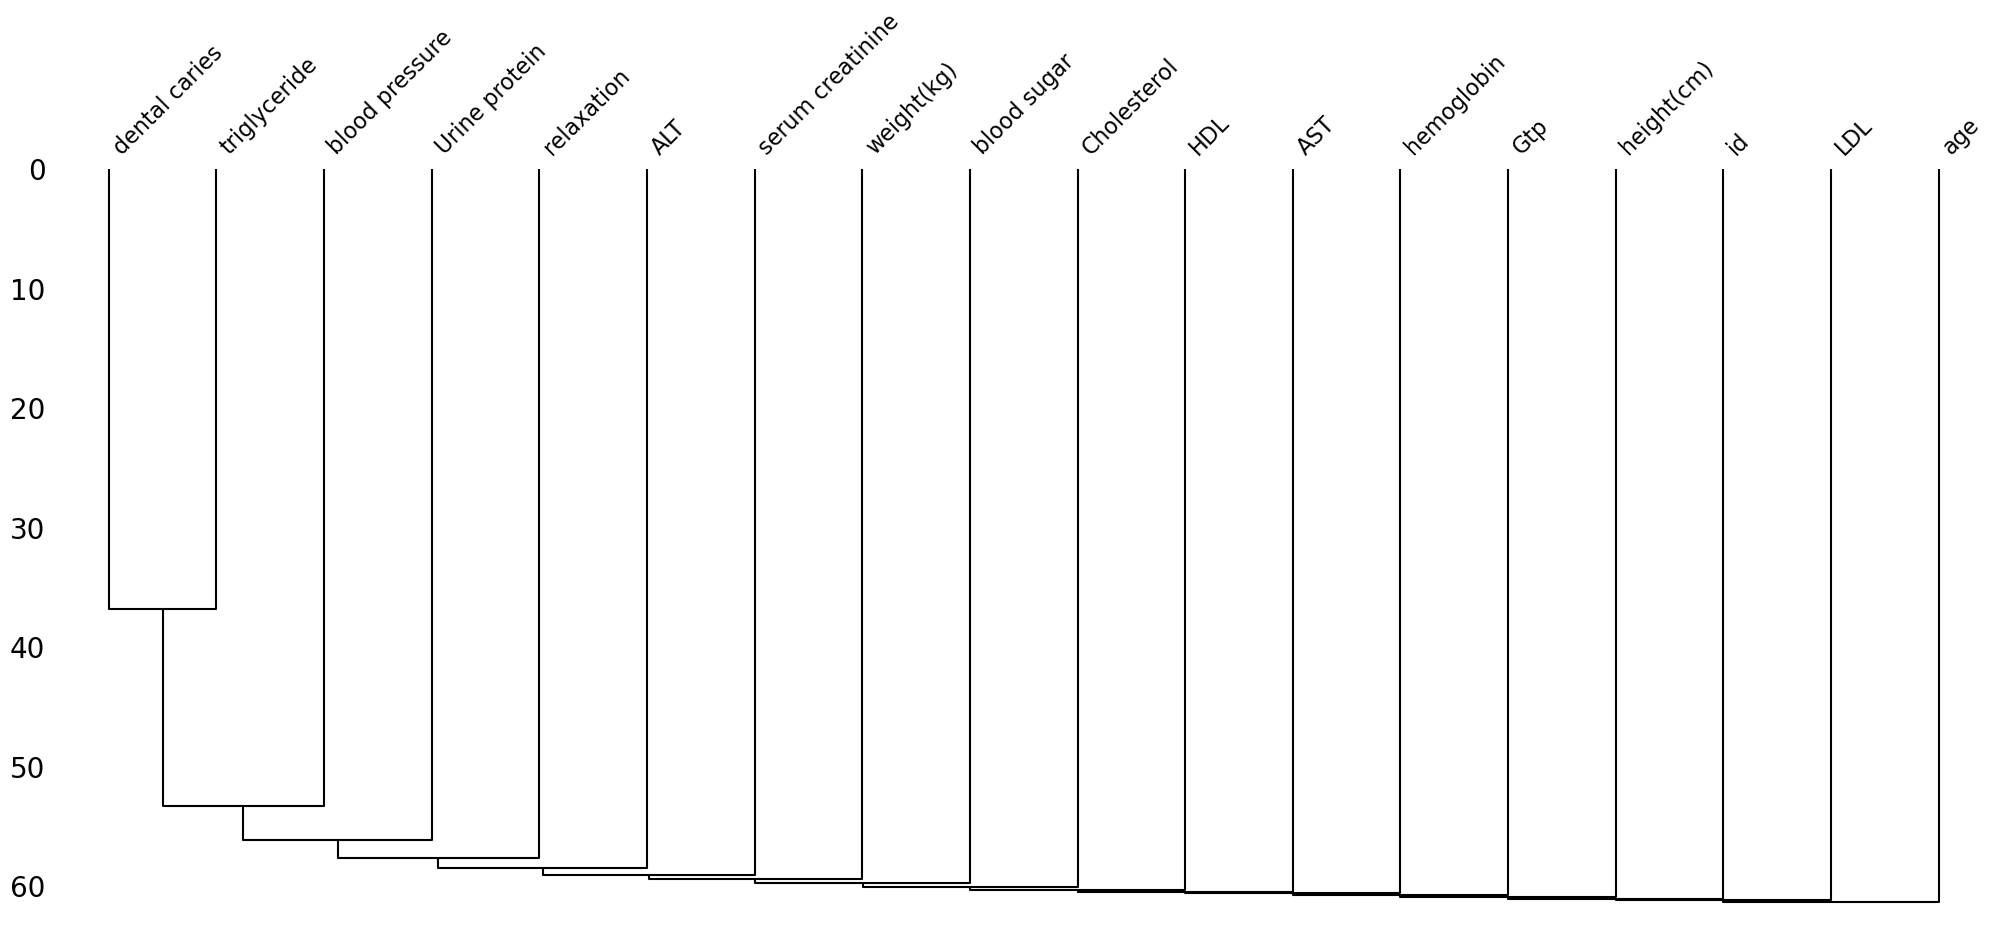

In [16]:
msno.dendrogram(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [18]:
data['age'].head()

0           NaN
1      7/5/1979
2    11/27/1954
3     9/13/1984
4     8/15/1984
Name: age, dtype: object

In [19]:
# Write your code here. Add as many boxes as you need.
data['age'] = pd.to_datetime(data['age'], errors='coerce').dt.year
current_year = pd.to_datetime('today').year
data['age'] = current_year - data['age']
data['age'].head()

0     NaN
1    45.0
2    70.0
3    40.0
4    40.0
Name: age, dtype: float64

In [20]:
numerical_columns = [
    'age','height(cm)', 'weight(kg)', 'relaxation', 'blood sugar', 'Cholesterol', 
     'HDL', 'LDL', 'hemoglobin', 'Urine protein', 'serum creatinine', 
    'AST', 'ALT', 'Gtp', 'blood pressure'
]

In [21]:
imputer = SimpleImputer(strategy='median')#check with mean too

data_imputed = data.copy()
data_imputed[numerical_columns] = imputer.fit_transform(data[numerical_columns])

cat_col = 'triglyceride'
data_imputed[cat_col] = data_imputed[cat_col].fillna(data_imputed[cat_col].mode()[0])

cat_encod = 'dental caries'
data_imputed[cat_encod] = data_imputed[cat_encod].map({'Yes': 1, 'No': 0})

## Feature Preprocessing


Preprocess the features to make them ready for using the model

In [24]:
# Write your code here. Add as many boxes as you need.
scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_imputed[numerical_columns])

X = scaled_features
y = data_imputed['blood pressure']

In [25]:
from sklearn.utils import shuffle
import numpy as np
unique, counts = np.unique(y,return_counts=True)
classes_to_remove = unique[counts == 1]
mask = ~np.isin(y,classes_to_remove)
y = y[mask]
X = X[mask] 

In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

## Model comparison with cross-validation

Train two models: XGBoost and RandomForest for predicting the target variable. Use 5-fold cross-validation to evaluate the performance of the models and compare them using adrquate metrics.

In [29]:
# Write your code here. Add as many boxes as you need.
xgb_model = XGBClassifier(objective='reg:squarederror')
rf_model = RandomForestClassifier()

# Cross-Validation

In [31]:
# Write your code here. Add as many boxes as you need.
from sklearn.model_selection import cross_val_predict
xgb_preds = cross_val_predict(xgb_model, X, y, cv=5)
rf_preds = cross_val_predict(rf_model, X, y, cv=5)

C:\Users\Beqir\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(
C:\Users\Beqir\anaconda3\Lib\site-packages\sklearn\model_selection\_split.py:737: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Assess the performance of the models by using different metrics provided by the `scikit-learn` library.

In [33]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

xgb_r2= r2_score(y,xgb_preds)
rf_r2 = r2_score(y,xgb_preds)

xgb_mae = mean_absolute_error(y, xgb_preds)
rf_mae = mean_absolute_error(y, rf_preds)

xgb_mse = mean_squared_error(y, xgb_preds)
rf_mse = mean_squared_error(y, rf_preds)


xgb_rmse = np.sqrt(xgb_mse)
rf_rmse = np.sqrt(rf_mse)

In [56]:
# Write your code here. Add as many boxes as you need.
print("XGBoost Results:")
print(f'R2: {xgb_r2:.3f}')
print(f'MAE: {xgb_mae:.3f}')
print(f'MSE: {xgb_mse:.3f}')
print(f'RMSE: {xgb_rmse:.3f}')
print('\n')
print("Random Forest Results:")
print(f'R2: {rf_r2:.3f}')
print(f'MAE: {rf_mae:.3f}')
print(f'MSE: {rf_mse:.3f}')
print(f'RMSE: {rf_rmse:.3f}')

XGBoost Results:
R2: 1.000
MAE: 0.003
MSE: 0.008
RMSE: 0.092


Random Forest Results:
R2: 1.000
MAE: 0.672
MSE: 5.698
RMSE: 2.387
